# 卷积神经网络的可视化

In [1]:
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

卷积神经网络学到的表示非常容易可视化，很大程度上是因为他们是视觉概念的表示。

三种最常用的可视化方法：
1. **可视化convnet的中间输出（中间激活）**：有助于理解卷积神经网络连续的层如何对输入进行变换，也有助于初步了解convnet每个过滤器的含义。
2. **可视化convnet的过滤器：**有助于理解卷积神经网络中每个过滤器容易接受的视觉模式或视觉概念。
3. **可视化图像中类激活的热力图**：有助于理解图像的哪个部分被识别为属于某个类别，从而可以定位图像中的物体。

## 可视化中间激活

是指对于给定输入，展示网络中各个卷积层和池化层输出的特征图（层的输出通常被称为该层的激活，即激活函数的输出）。

In [2]:
# 预处理单张图像
from keras.preprocessing import image

img_path = '/home/bingli/Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'

# Loads an image into PIL format (color_mode: rbg)
img = image.load_img(img_path, target_size=(150, 150))
# Converts a PIL Image instance to a Numpy array
img_tensor = image.img_to_array(img)

Using TensorFlow backend.


In [3]:
type(img)

PIL.Image.Image

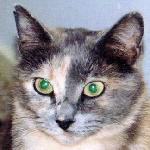

In [4]:
img

In [5]:
type(img_tensor)

numpy.ndarray

In [6]:
img_tensor.shape

(150, 150, 3)

In [7]:
img_tensor = np.expand_dims(img_tensor, axis=0)

In [8]:
img_tensor.shape

(1, 150, 150, 3)

In [9]:
img_tensor /= 255.

> **记住**：训练模型的输入数据都用这种方法预处理。

In [10]:
from keras.models import load_model

model = load_model('cats_and_dogs_small_2.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [11]:
# 组成模型的各个层
model.layers

In [12]:
model.inputs  # 模型的输入, list

[<tf.Tensor 'conv2d_8_input:0' shape=(?, 150, 150, 3) dtype=float32>]

In [13]:
model.input  # tensorflow.python.framework.ops.Tensor

<tf.Tensor 'conv2d_8_input:0' shape=(?, 150, 150, 3) dtype=float32>

In [14]:
model.input_shape

(None, 150, 150, 3)

In [15]:
model.input_names

['conv2d_8_input']

In [16]:
model.outputs  # 模型的输出

[<tf.Tensor 'dense_6/Sigmoid:0' shape=(?, 1) dtype=float32>]

In [17]:
model.output

<tf.Tensor 'dense_6/Sigmoid:0' shape=(?, 1) dtype=float32>

In [18]:
model.output_shape

(None, 1)

In [19]:
model.output_names

['dense_6']

查看第七层（最后一个池化层）的输入和输出：

In [20]:
model.layers[7].input

<tf.Tensor 'conv2d_11/Relu:0' shape=(?, 15, 15, 128) dtype=float32>

In [21]:
model.layers[7].output

<tf.Tensor 'max_pooling2d_10/MaxPool:0' shape=(?, 7, 7, 128) dtype=float32>

为了提取想要查看的特征图，需要创建一个Keras模型，以图像批量作为输入，并输出所有卷积层和池化层的激活。为此使用Keras的`Model`类。

In [22]:
from keras import models

# 提取模型前8层的输出
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

In [23]:
# 以预测模式运行模型
activations = activation_model.predict(img_tensor)

In [24]:
# 8个数组组成的列表，每个层激活对应一个数组
activations

[array([[[[3.68735418e-02, 0.00000000e+00, 1.57711655e-02, ...,
           0.00000000e+00, 2.30878189e-01, 0.00000000e+00],
          [2.68899873e-02, 0.00000000e+00, 1.26937944e-02, ...,
           0.00000000e+00, 2.51786053e-01, 0.00000000e+00],
          [6.18478097e-02, 0.00000000e+00, 1.48651553e-02, ...,
           0.00000000e+00, 2.36842588e-01, 0.00000000e+00],
          ...,
          [8.04965049e-02, 0.00000000e+00, 4.27665282e-03, ...,
           0.00000000e+00, 3.32744360e-01, 0.00000000e+00],
          [7.54180402e-02, 0.00000000e+00, 1.48033397e-02, ...,
           0.00000000e+00, 3.36235821e-01, 0.00000000e+00],
          [7.30576962e-02, 0.00000000e+00, 1.99768599e-02, ...,
           0.00000000e+00, 3.33631694e-01, 0.00000000e+00]],
 
         [[4.11479957e-02, 0.00000000e+00, 1.06426440e-02, ...,
           0.00000000e+00, 2.26147667e-01, 0.00000000e+00],
          [3.49746533e-02, 0.00000000e+00, 6.66462723e-03, ...,
           0.00000000e+00, 2.47912124e-01, 0.00000

对于输入的猫图像，第一个卷积层的激活如下：

In [25]:
first_layer_activation = activations[0]
first_layer_activation.shape

(1, 148, 148, 32)

> 它是大小为148x148的特征图，有32个通道。

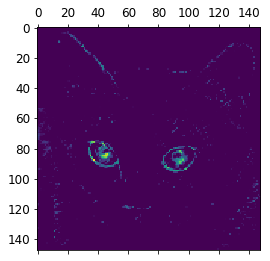

In [26]:
# 将第4个通道可视化
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

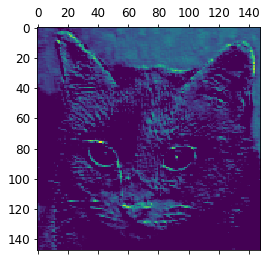

In [27]:
# 将第7个通道可视化
plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

第一个池化层：

In [28]:
second_layer_activation = activations[1]
second_layer_activation.shape

(1, 74, 74, 32)

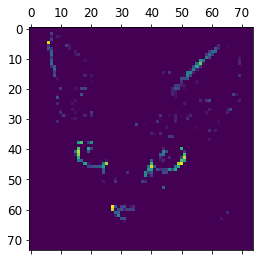

In [29]:
# 将第一个通道可视化
plt.matshow(second_layer_activation[0, :, :, 1], cmap='viridis')

The name of each layer:
 ['conv2d_8', 'max_pooling2d_7', 'conv2d_9', 'max_pooling2d_8', 'conv2d_10', 'max_pooling2d_9', 'conv2d_11', 'max_pooling2d_10']


/home/bingli/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: invalid value encountered in true_divide


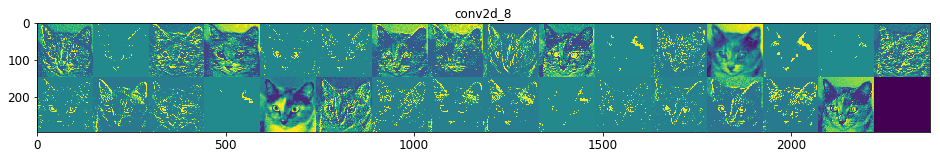

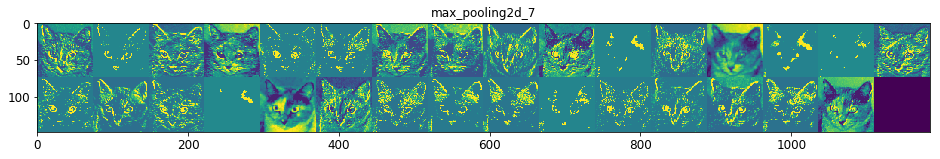

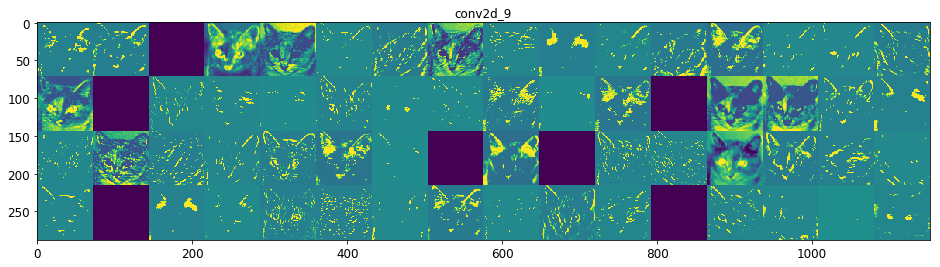

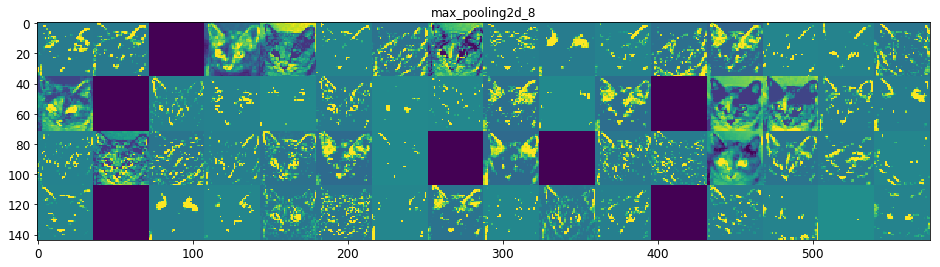

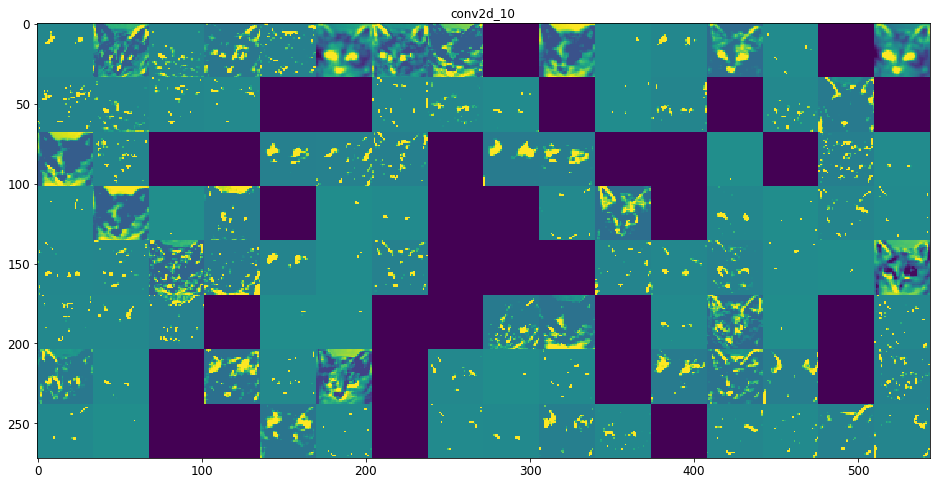

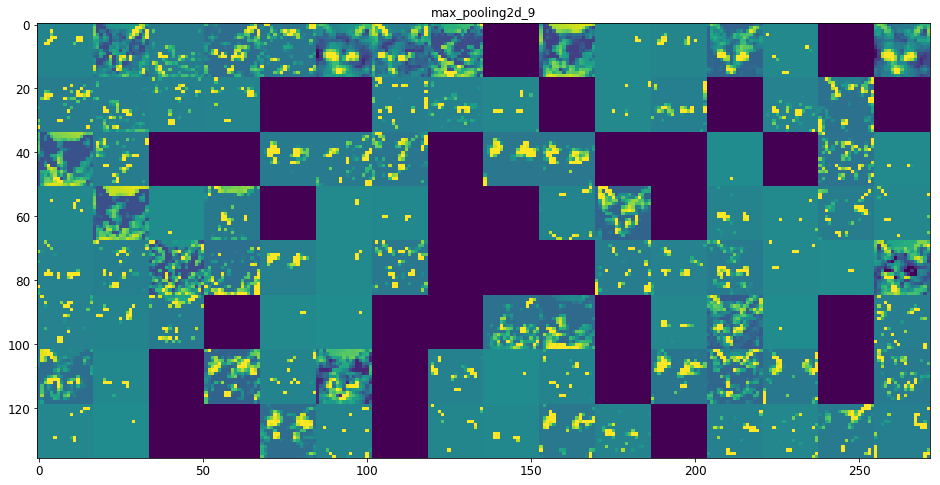

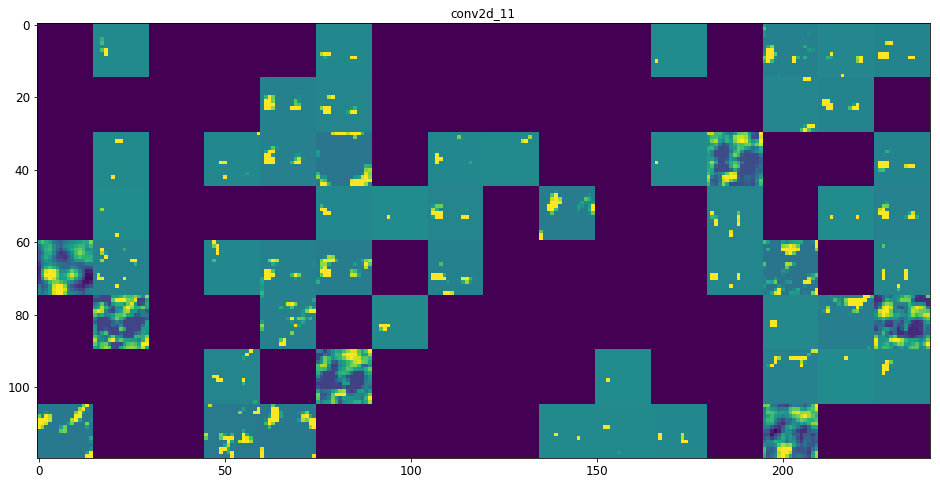

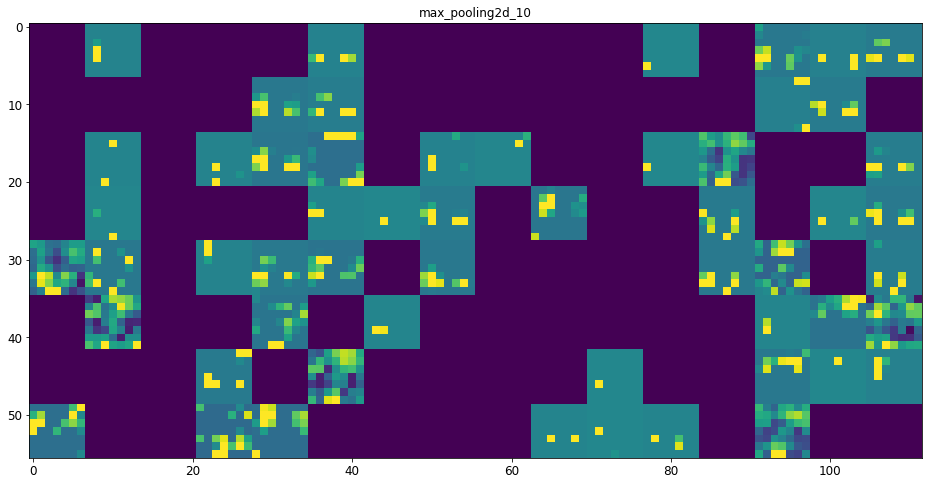

In [30]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
print("The name of each layer:\n", layer_names)

image_per_row = 16  # 每行显示16张图

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]   # 特征图的特征个数
    size = layer_activation.shape[1]  # 特征的形状为(1, size, size, n_features)
    n_rows = n_features // image_per_row  # 行数
    display_grid = np.zeros((n_rows * size, image_per_row * size))
    
    for row in range(n_rows):  # 每一行
        for col in range(image_per_row):  # 该行的每一列
            channel_image = layer_activation[0, :, :, row * image_per_row + col]
            # 对特征进行处理，使其看起来更美观
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[row * size: (row + 1) * size,
                         col * size: (col + 1) * size] = channel_image

    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()

## 可视化卷积神经网络的过滤器

观察convnet学到的过滤器的一种方法是显示每个过滤器所响应视觉模型。可以通过在输入空间中进行梯度上升来实现：从空白输入图像开始，将梯度下降应用于convnet输入图像的值，其目的是让某个过滤器的响应最大化。得到的输入图像是选定过滤器具有最大响应的图像。

过程：
1. 构建一个损失函数，其目的是让某个卷积层的某个过滤器的值最大化；
2. 使用梯度下降来调节输入图像的值，以便让这个激活值最大化。

In [31]:
from keras.applications import VGG16

model = VGG16(weights='imagenet', include_top=False)

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0         
__________

In [33]:
model.input

<tf.Tensor 'input_1:0' shape=(?, ?, ?, 3) dtype=float32>

In [34]:
from keras import backend as K

In [35]:
# VGG16网络的block3_conv1层第0个过滤器的损失：
layer_name = 'block3_conv1'
filter_index = 0

layer_output = model.get_layer(layer_name).output
print("block_conv1 output: ", layer_output)

loss = K.mean(layer_output[:, :, :, filter_index])
loss

block_conv1 output:  Tensor("block3_conv1/Relu:0", shape=(?, ?, ?, 256), dtype=float32)


<tf.Tensor 'Mean:0' shape=() dtype=float32>

为实现梯度下降，需要得到损失相对于模型输入的梯度。为此，使用`Keras`的`backend`模块内置的`gradients`函数.

In [36]:
# 获取损失相对于输入的梯度
grads = K.gradients(loss, model.input)[0]

In [37]:
type(grads)

tensorflow.python.framework.ops.Tensor

> 调用`gradients`返回的是一个张量列表（本例中列表长度为1）。只保留第一个元素，它是一个张量。

为让**梯度下降过程顺利进行**，一个显而易见的技巧是**将梯度张量除以其L2范数来标准化**。这就**确保了输入图像的更新大小始终位于相同的范围**。

In [38]:
# 梯度标准化技巧
grads /= K.sqrt(K.mean(K.square(grads))) + 1e-5  # 除法前加上一个小数，以防除以0

给定输入图像，计算损失张量和梯度张量的值。

In [39]:
iterate = K.function([model.input], [loss, grads])  # iterate是一个函数

loss_value, grads_value = iterate([np.zeros((1, 150, 150, 3))])

In [40]:
type(iterate)

keras.backend.tensorflow_backend.Function

In [41]:
loss_value

0.0

In [42]:
grads_value.shape

(1, 150, 150, 3)

In [43]:
grads_value

array([[[[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        ...,

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.],
         ...,
         [0., 0., 0.],
         [0., 0., 0.],
         [0., 0., 0.]]]], dtype=float32)

In [44]:
# 通过随机梯度下降来进行损失最大化
input_img_data = np.random.random((1, 150, 150, 3)) * 20 + 128.  # 一张带有噪声图像
step = 1.  # learning rate
for i in range(40):  # 40次梯度上升
    # 计算损失值和梯度值
    loss_value, grads_value = iterate([input_img_data])
    # 沿损失最大化的方向调节图像
    input_img_data += grads_value * step

得到的图像张量是(1, 150, 150, 3)的浮点数张量，其取值可能不是[0, 255]区间内的整数。需要进行处理，将其转化为可显示的图像。

In [45]:
def deprocess_image(x):
    # 标准化，均值为0，标准差为0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.5
    
    x += 0.5
    x = np.clip(x, 0, 1)
    
    # 将x转换为RGB数组
    x *= 255
    x = np.clip(x, 0, 255).astype('uint8')
    return x

In [46]:
# 构建一个损失函数，将该层第n个过滤器的激活最大化
def generate_pattern(layer_name, filter_index, size=150):
    """生成过滤器可视化的函数。
    输入一个层的名称和一个过滤器索引。
    返回一个有效的图像张量，表示能够将特定过滤器的激活最大化的模式。"""
    layer_output = model.get_layer(layer_name).output
    loss = K.mean(layer_output[:, :, :, filter_index])
    
    grads = K.gradients(loss, model.input)[0]  # 损失相对于输入图像的梯度
    # 标准化技巧：将梯度标准化
    grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)
    # 给定输入图像的损失和梯度
    iterate = K.function([model.input], [loss, grads])
    input_img_data = np.random.random((1, size, size, 3)) * 20 + 128.
    
    step = 1.
    for i in range(40):
        loss_value, grads_value = iterate([input_img_data])
        input_img_data += grads_value * step
    
    img = input_img_data[0]
    return deprocess_image(img)

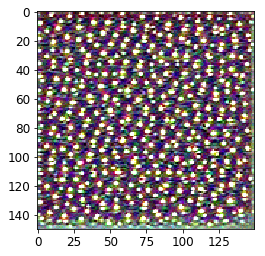

In [47]:
plt.imshow(generate_pattern('block3_conv1', 0))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


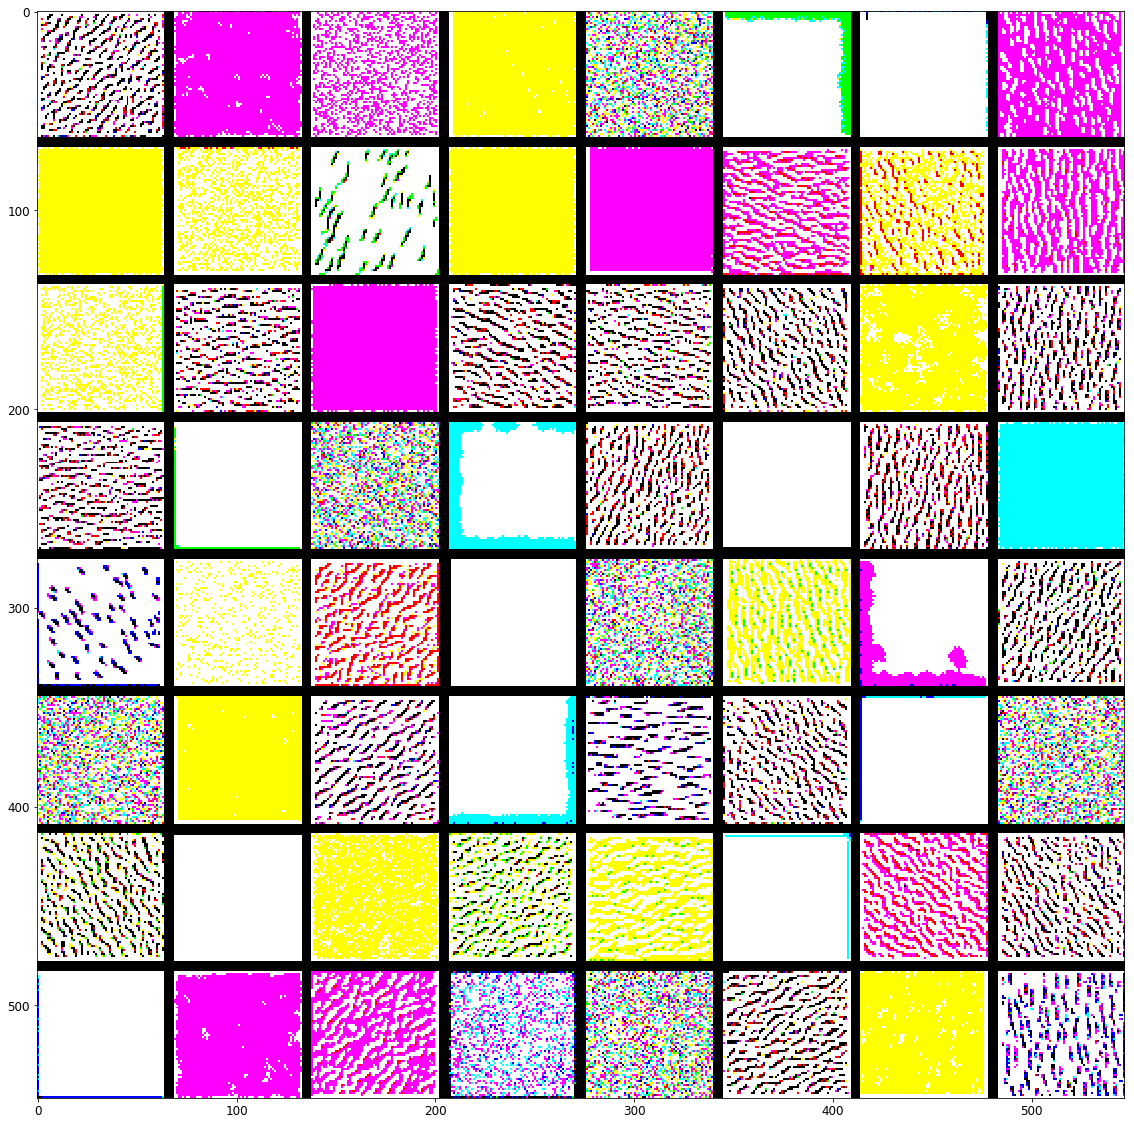

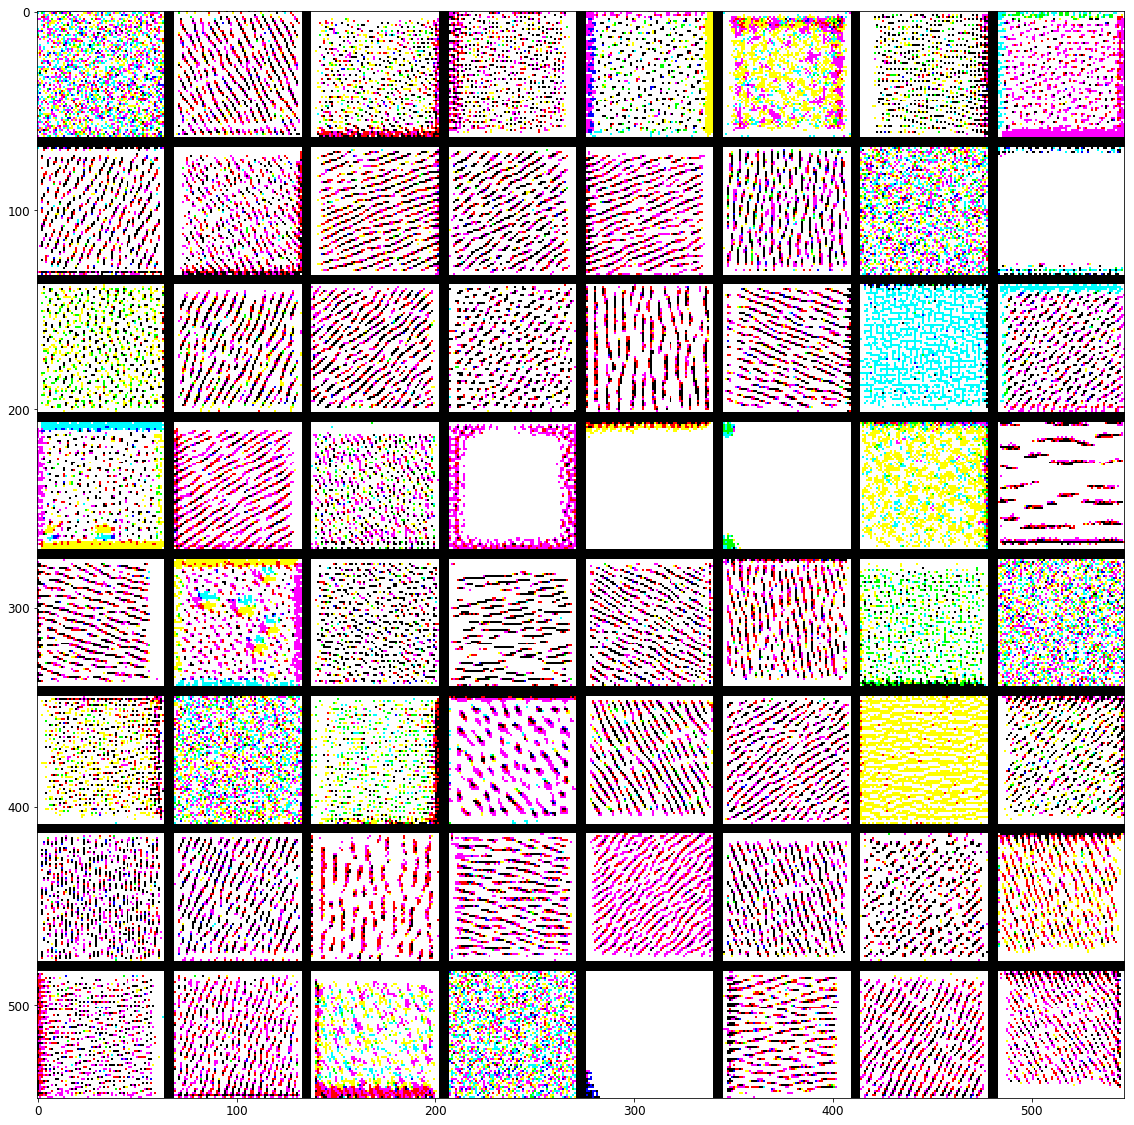

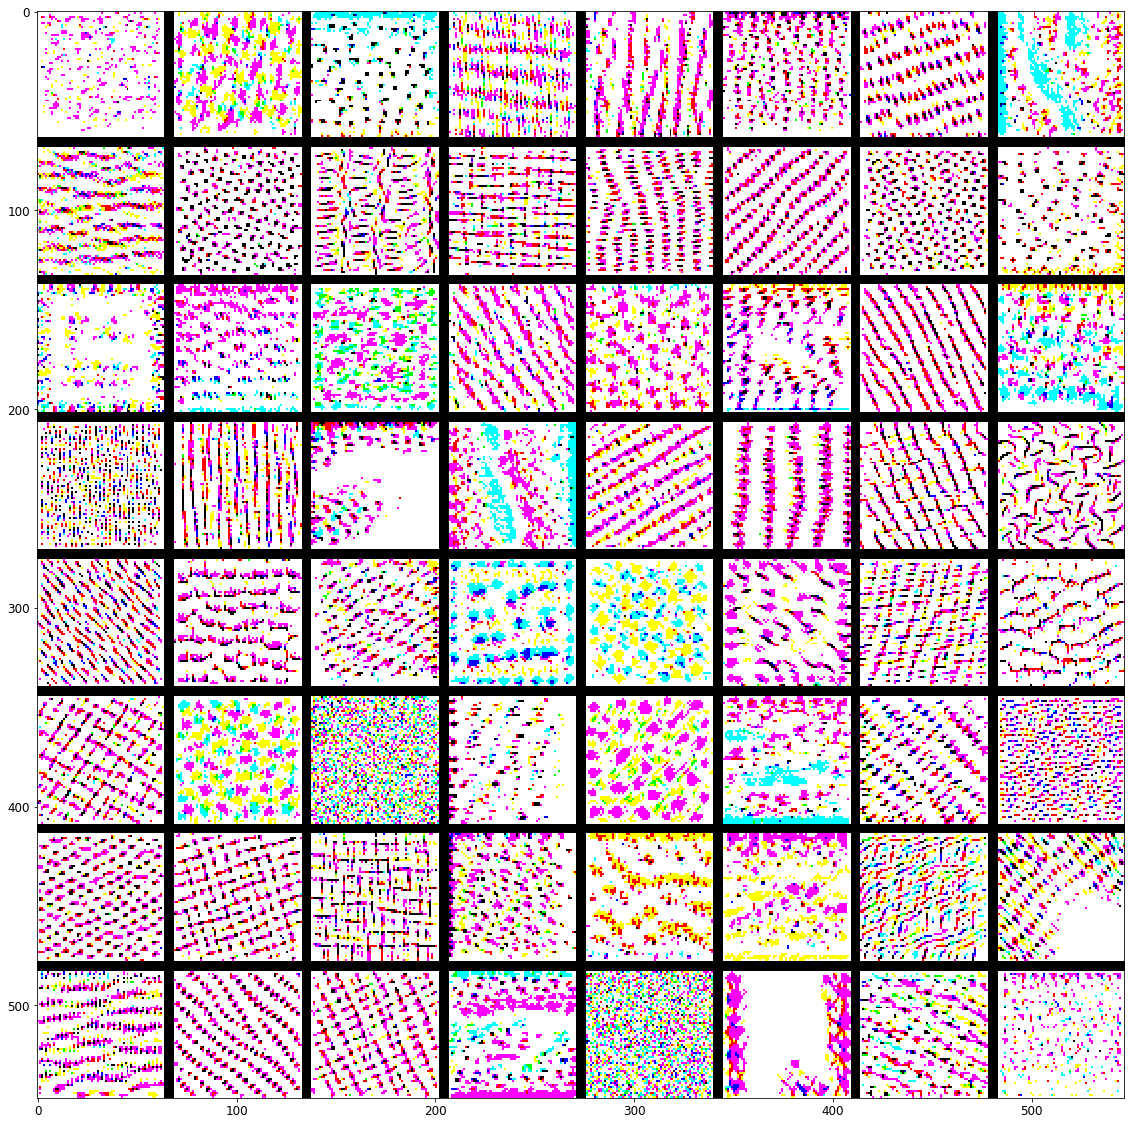

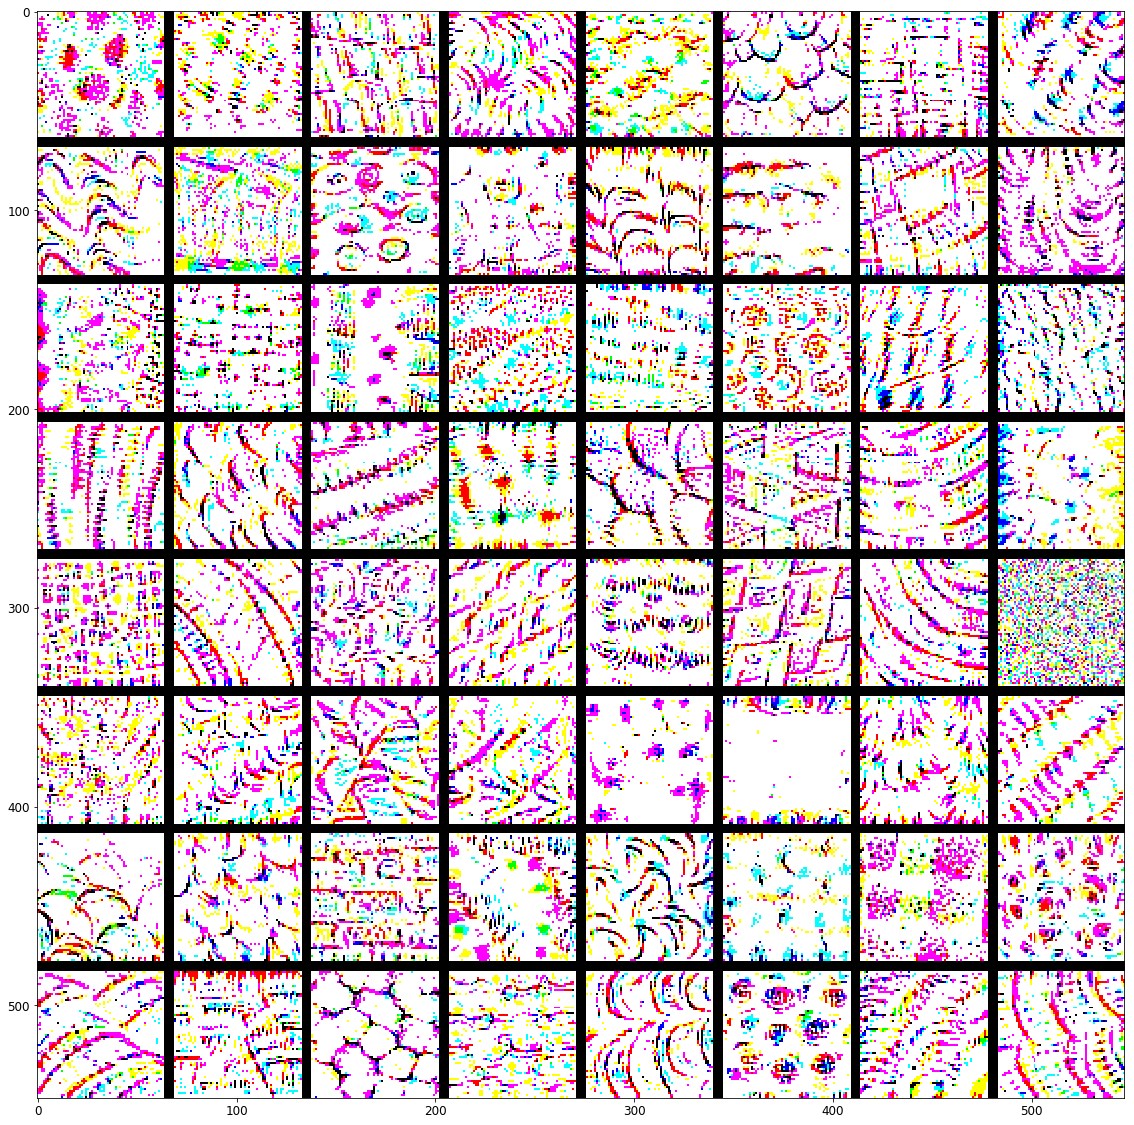

In [48]:
for layer_name in ['block1_conv1', 'block2_conv1',
                       'block3_conv1', 'block4_conv1']:
        size = 64
        margin = 5

        # 空图像（全黑色），用于保存结果
        results = np.zeros((size * 8 + 7 * margin, size * 8 + 7 * margin, 3))

        for i in range(8):  # 遍历行
            for j in range(8):  # 遍历列
                filter_img = generate_pattern(
                    layer_name, i + (j * 8), size=size)
                horizontal_start = i * size + i * margin
                horizontal_end = horizontal_start + size
                vertical_start = j * size + j * margin
                vertical_end = vertical_start + size
                results[horizontal_start: horizontal_end,
                        vertical_start: vertical_end, :] = filter_img
                
        # Display the results grid
        plt.figure(figsize=(20, 20))
        plt.imshow(results)
        
plt.show()

> 卷积神经网络中每一层都学习一组过滤器，以便将其输入表示为过滤器的组合。随着层数的加深，卷积神经网络中的过滤器变得越来越复杂，越来越明细。  
+ 模型第一层的过滤器对应简单的方向边缘和颜色（还有一些是彩色边缘）
+ 更高层的过滤器类似于自然图像中的纹理：羽毛、眼睛、树叶等。

## 可视化类激活的热力图

类激活图可视化，是指对输入图像生成类激活的热力图。类激活热力图是与特定输出类别相关的二维分数网格，对任何输入图像的每个位置都要进行计算，它表示每个位置对该类别的重要程度。

In [49]:
from keras.applications.vgg16 import VGG16

model = VGG16(weights='imagenet')

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

将图像转换为VGG16模型能读取的格式：

In [51]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions

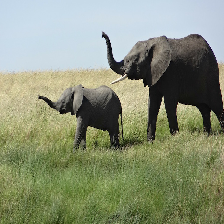

In [52]:
img_path = '/home/bingli/Downloads/creative_common_elephant.jpeg'
# VGG16在大小为(224, 224)的图像上训练
img = image.load_img(img_path, target_size=(224, 224))
img

In [53]:
x = image.img_to_array(img)  # x.dtype: float32
x.shape

(224, 224, 3)

In [54]:
x = np.expand_dims(x, axis=0)  # (1, 224, 224, 3)
x.shape

(1, 224, 224, 3)

In [55]:
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [56]:
# 在图像上运行与训练的VGG16网络
preds = model.predict(x)

In [57]:
preds.shape

(1, 1000)

In [58]:
# 对这张图像预测的前三个类别
decode_predictions(preds, top=3)[0]

[('n02504458', 'African_elephant', 0.9094216),
 ('n01871265', 'tusker', 0.086182274),
 ('n02504013', 'Indian_elephant', 0.0043545775)]

In [59]:
np.argmax(preds[0])

386

使用Grad-CAM算法来展示哪部分最像非洲象：

**Grad-CAM算法**：给定一张输入图像，对于一个卷积层的输出特征图，用类别相对于通道的梯度来对这个特征图中的每个通道进行加权。

In [60]:
model.output

<tf.Tensor 'predictions/Softmax:0' shape=(?, 1000) dtype=float32>

In [61]:
# 预测向量中的“非洲象”元素
african_elephant_output = model.output[:, 386]
african_elephant_output

<tf.Tensor 'strided_slice_258:0' shape=(?,) dtype=float32>

In [62]:
# 最后一个卷积层
last_conv_layer = model.get_layer('block5_conv3')
last_conv_layer

In [63]:
# 非洲象类别相对于block5_conv3输出特征图的梯度
grads = K.gradients(african_elephant_output, last_conv_layer.output)[0]
grads

<tf.Tensor 'gradients_258/block5_pool_1/MaxPool_grad/MaxPoolGrad:0' shape=(?, 14, 14, 512) dtype=float32>

In [64]:
# 形状为(512,)的向量，每个元素是特定通道的梯度平均值
pooled_grads = K.mean(grads, axis=(0, 1, 2))
pooled_grads

<tf.Tensor 'Mean_516:0' shape=(512,) dtype=float32>

In [65]:
# 对于给定的样本图像，pooled_grads和block5_conv3层的输出特征图
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
# 对于这个大象样本
pooled_grads_value, conv_layer_output_value = iterate([x])

In [66]:
pooled_grads_value.shape

(512,)

In [67]:
conv_layer_output_value.shape

(14, 14, 512)

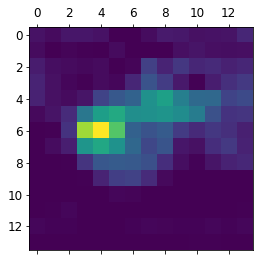

In [68]:
# 将特征图数组的每个通道乘以这个通道对大象类别的重要程度
for i in range(512):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

# 得到的特征图的逐通道平均值即为类激活的热力图 
heatmap = np.mean(conv_layer_output_value, axis=-1)
# 为方便可视化，标准到０－１范围内
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)
plt.matshow(heatmap)

In [69]:
heatmap.shape

(14, 14)

In [70]:
# 用OpenCV来生成一张图像，将原始图像叠加在热力图上
import cv2

img = cv2.imread(img_path)  # 用cv2加载原图,shape=(600, 899, 3)
# 将热力图的带下调整为与原始图像相同(14, 14)->(600, 899)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
# 热力图转换为RGB格式
heatmap = np.uint8(255 * heatmap)
# 将热力图应用于原始图像
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img  # 0.4是热力图强度因子
cv2.imwrite('/home/bingli/Downloads/elephant_cam.jpg', superimposed_img)

True

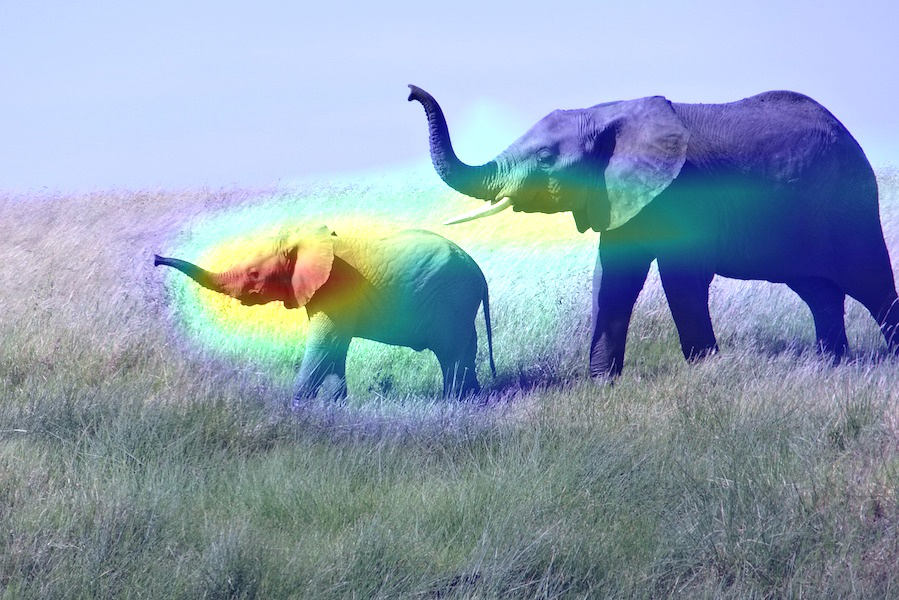

In [71]:
img_path = '/home/bingli/Downloads/elephant_cam.jpg'
# VGG16在大小为(224, 224)的图像上训练
img = image.load_img(img_path)
img